In [10]:
# importing the libraries
import pandas as pd
import numpy as np
import cv2


# for reading and displaying images
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline

# for creating validation set
from sklearn.model_selection import train_test_split

# for evaluating the model
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# PyTorch libraries and modules
from PIL import Image
import torch
import torchvision as tv
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD

In [2]:
# Load in the data
# loading dataset
train = pd.read_csv('C:/Users/djcoo/NeuralNet_Project/Images/data_train.csv')
test = pd.read_csv('C:/Users/djcoo/NeuralNet_Project/Images/data_test.csv')

print(train)
print('\n')
print(test)

     Unnamed: 0                    path  class_id  minifigure_name_x  \
0           295     marvel/0001/002.jpg         1         SPIDER-MAN   
1           300     marvel/0001/003.jpg         1         SPIDER-MAN   
2           299     marvel/0001/009.jpg         1         SPIDER-MAN   
3           298     marvel/0001/010.jpg         1         SPIDER-MAN   
4           297     marvel/0001/005.jpg         1         SPIDER-MAN   
..          ...                     ...       ...                ...   
335         182  star-wars/0015/007.jpg        36  EMPEROR PALPATINE   
336         180            test/071.jpg        36  EMPEROR PALPATINE   
337         179  star-wars/0015/005.jpg        36  EMPEROR PALPATINE   
338         184  star-wars/0015/006.jpg        36  EMPEROR PALPATINE   
339         181            test/073.jpg        36  EMPEROR PALPATINE   

                   tmp_name  minifigure_name_y  
0            1 - SPIDER-MAN         SPIDER-MAN  
1            1 - SPIDER-MAN         S

In [24]:
#Convert the csv into a torch dataset
class LEGODataSet(torch.utils.data.Dataset):
    def __init__(self, csv_file, root_dir):
        self.df = pd.read_csv(csv_file).drop(['Unnamed: 0','tmp_name','class_id'], axis = 1)
        #Dropping unnecessary columns
        self.root_dir = root_dir

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        row = self.df.iloc[index]
        path = 'C:/Users/djcoo/NeuralNet_Project/Images/' + row['path']
        img = Image.open(path)
        #Returns as dict
        sample = {'image': img}
        return sample
    
#CHANGE ACCORDINGLY (ROOTDIR)
torch_lego_train = LEGODataSet(csv_file = 'C:/Users/djcoo/NeuralNet_Project/Images/data_train.csv', root_dir = 'C:/Users/djcoo/NeuralNet_Project/Images/')
torch_lego_test = LEGODataSet(csv_file = 'C:/Users/djcoo/NeuralNet_Project/Images/data_test.csv', root_dir = 'C:/Users/djcoo/NeuralNet_Project/Images/')

dataloader_train = torch.utils.data.DataLoader(torch_lego_train)
dataloader_test = torch.utils.data.DataLoader(torch_lego_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


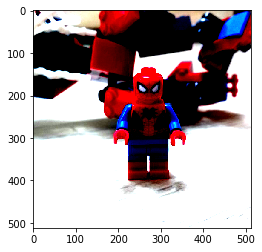

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


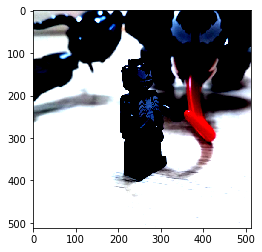

In [25]:
norm_transform = tv.transforms.Compose([
    tv.transforms.ToTensor(),
    #VERSATILE MEAN/STD FROM IMAGENET
    tv.transforms.Normalize(mean=[0.485, 0.456, 0.406],
                     std=[0.229, 0.224, 0.225])
])

#For loop to normalize all train
for i in range(len(torch_lego_train)):
    #Gets current image
    curr_img = torch_lego_train[i]['image']
    norm_img = norm_transform(curr_img)
    norm_img_nparr = np.array(norm_img)
    ### SAVE IMAGES TO DATASET BELOW ###
    view_img = np.array(norm_img).transpose(1,2,0)
    plt.imshow(view_img)
    if i == 3:
        plt.show()
        break
        
#For loop to normalize all test
for i in range(len(torch_lego_test)):
    #Gets current image
    curr_img = torch_lego_test[i]['image']
    norm_img = norm_transform(curr_img)
    norm_img_nparr = np.array(norm_img)
    ### SAVE IMAGES TO DATASET BELOW ###
    view_img = np.array(norm_img).transpose(1,2,0)
    plt.imshow(view_img)
    if i == 3:
        plt.show()
        break

In [ ]:
class Rescale(object):
    #output_size MUST be a tuple --> No need for simply int arg
    def __init__(self, output_size):
        assert isinstance(output_size, tuple)
        self.output_size = output_size
    
    def __call__(self, sample):
        img = sample['image']
        
        h, w = img.shape[:2]
        new_h, new_w = self.output_size
        new_h, new_w = int(new_h), int(new_w)
        
        img = skimage.transform.resize(img, (new_h, new_w))
        
        return {'image': img}

scale = Rescale((256,256))
scale_trans = tv.transforms.Compose([
    Rescale((256,256))
])

print(enumerate(scale, scale_trans))